In [13]:
import fiona
from shapely.geometry import MultiPolygon, LineString, shape, mapping
import itertools

tracts = r"C:\Users\crowk\trio-capstone\data pulling code\data\census tracts\CensusTractsStl.shp"

# Read the shapefile and create a MultiPolygon
Multi = MultiPolygon([shape(poly['geometry']) for poly in fiona.open(tracts)])

# Schema of the dual graph shapefile
schema = {'geometry': 'LineString', 'properties': {'test': 'int'}}

# Create the dual graph shapefile
with fiona.open('dual_graph.shp', 'w', 'ESRI Shapefile', schema) as e:
    for poly1, poly2 in itertools.combinations(Multi.geoms, 2):
        if poly1.touches(poly2):
            e.write({'geometry': mapping(LineString([poly1.centroid, poly2.centroid])), 'properties': {'test': 1}})


In [30]:
import geopandas as gpd
from shapely.geometry import MultiPolygon
import itertools

tracts_path = r"C:\Users\crowk\trio-capstone\data pulling code\data\census tracts\CensusTractsStl.shp"

# Read the shapefile and create a GeoDataFrame
gdf = gpd.read_file(tracts_path)
gdf.head()

import geopandas as gpd
from shapely.geometry import MultiPolygon
import itertools

tracts_path = r"C:\Users\crowk\trio-capstone\data pulling code\data\census tracts\CensusTractsStl.shp"

# Read the shapefile and create a GeoDataFrame
gdf = gpd.read_file(tracts_path)

# Initialize an empty dictionary to store the graph
graph_dict = {}

# Create the graph dictionary
for poly1, poly2 in itertools.combinations(Multi.geoms, 2):
    if poly1.touches(poly2):
        centroid1 = poly1.centroid.coords[0]
        centroid2 = poly2.centroid.coords[0]
        if centroid1 not in graph_dict:
            graph_dict[centroid1] = []
        if centroid2 not in graph_dict:
            graph_dict[centroid2] = []
        graph_dict[centroid1].append(centroid2)
        graph_dict[centroid2].append(centroid1)

'''
for key, value in graph_dict.items():
    print(f"{key}: {value
'''

(-90.21375011824325, 38.613290428855095): [(-90.20460703793492, 38.61988851778707), (-90.22518677624015, 38.61128040271964), (-90.19951236814303, 38.60417175513406), (-90.21694458528486, 38.605636006678616)]
(-90.20460703793492, 38.61988851778707): [(-90.21375011824325, 38.613290428855095), (-90.20294599772721, 38.62930987210153), (-90.22591997088308, 38.63195231127282), (-90.22518677624015, 38.61128040271964), (-90.2357220483681, 38.61929841779618), (-90.2102716733564, 38.637493548117064), (-90.19951236814303, 38.60417175513406), (-90.18856923748413, 38.62750387307079)]
(-90.22518677624015, 38.61128040271964): [(-90.21375011824325, 38.613290428855095), (-90.23739769086833, 38.60952440118697), (-90.20460703793492, 38.61988851778707), (-90.2357220483681, 38.61929841779618), (-90.21694458528486, 38.605636006678616), (-90.22842464635642, 38.59881059553109), (-90.22080379385561, 38.59515856108465)]
(-90.19951236814303, 38.60417175513406): [(-90.21375011824325, 38.613290428855095), (-90.214

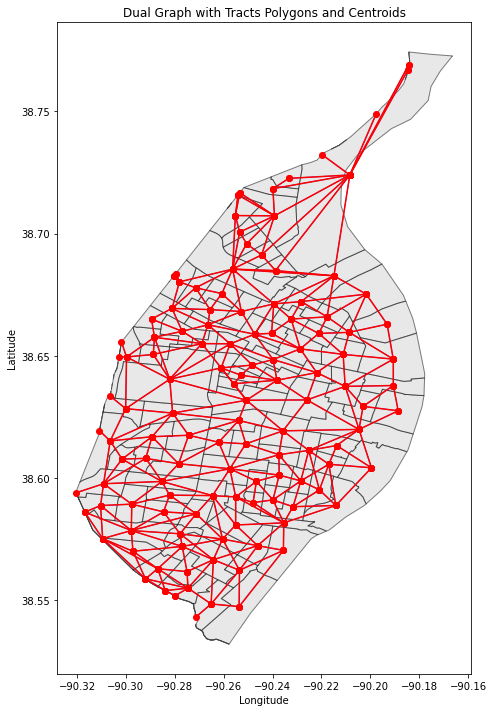

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString

# Read the dual graph shapefile
dual_graph = gpd.read_file('dual_graph.shp')

# Read the tracts shapefile
tracts = gpd.read_file(r"C:\Users\crowk\trio-capstone\data pulling code\data\census tracts\CensusTractsStl.shp")

# Create a GeoDataFrame to store the graph edges
edges_df = gpd.GeoDataFrame(geometry=dual_graph['geometry'])

# Plotting the graph and tracts polygons
fig, ax = plt.subplots(figsize=(10, 10))

# Plot tracts polygons
tracts.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.5)

# Plot dual graph edges
dual_graph.plot(ax=ax, color='blue', alpha=0.7, linewidth=1)

# Plot centroids of polygons
for _, row in dual_graph.iterrows():
    centroid = LineString(row['geometry'].coords[:2])  # Get LineString from geometry
    ax.plot(*centroid.xy, marker='o', color='red')

ax.set_title('Dual Graph with Tracts Polygons and Centroids')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.tight_layout()
plt.show()


In [32]:
import csv

with open('data/TractAdjacency.csv', 'w') as f:
    w = csv.DictWriter(f, graph_dict.keys())
    w.writeheader()
    w.writerow(graph_dict)